<a href="https://colab.research.google.com/github/ficorrea/data_science/blob/main/teste_ab/ab_testing_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **EDA**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('dark')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Comunidade DS/AB Test/ab_testing.csv', parse_dates=['date'])
df.head()

,uid,country,gender,spent,purchases,date,group,device
0,11115722,MEX,F,1595,5,2016-03-08,GRP B,I
1,11122053,USA,M,498,2,2017-07-14,GRP B,I
2,11128688,USA,F,2394,6,2017-09-17,GRP A,I
3,11130578,USA,F,1197,3,2017-11-30,GRP A,I
4,11130759,ESP,M,1297,3,2018-01-10,GRP B,A


In [4]:
# Add year and month fields
df['year'] = df.apply(lambda x: x.date.year, axis=1)
df['month'] = df.apply(lambda x: x.date.month, axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45883 entries, 0 to 45882
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   uid        45883 non-null  int64         
 1   country    45883 non-null  object        
 2   gender     45883 non-null  object        
 3   spent      45883 non-null  int64         
 4   purchases  45883 non-null  int64         
 5   date       45883 non-null  datetime64[ns]
 6   group      45883 non-null  object        
 7   device     45883 non-null  object        
 8   year       45883 non-null  int64         
 9   month      45883 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 3.5+ MB


#### Dicionário de dados:


* **uuid**: ID do usuário
* **country**: País do usuário
* **gender**: Gênero do usuário
* **spent**: Valor total gasto pelo usuário
* **purchases**: Compras do usuário
* **date**: Data da compra
* **group**: Grupo do teste AB que usuário está inserido
* **device**: I -> compra feita pela internet, A -> compra feita pelo APP
* **year**: Ano em que ocorreu a compra
* **month**: Mês em que ocorreu a compra


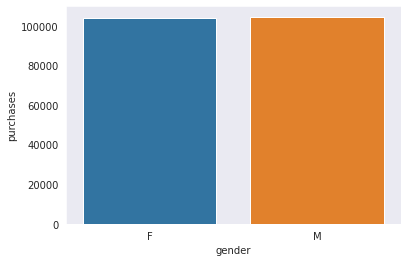

In [6]:
# Checking buys for gender
sns.barplot(data=df.groupby('gender', as_index=False).agg({'purchases': 'sum'}), x='gender', y='purchases')
plt.show()

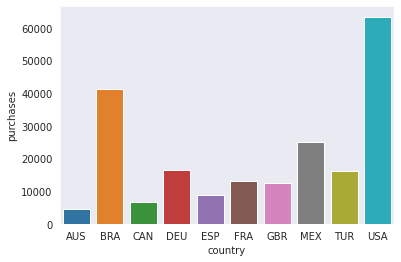

In [7]:
# Check buys by country
sns.barplot(data=df.groupby('country', as_index=False).agg({'purchases': 'sum'}), x='country', y='purchases')
plt.show()

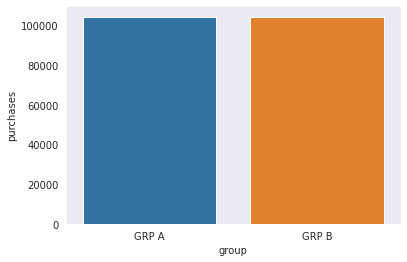

In [8]:
# Check buys by group
sns.barplot(data=df.groupby('group', as_index=False).agg({'purchases': 'sum'}), x='group', y='purchases')
plt.show()

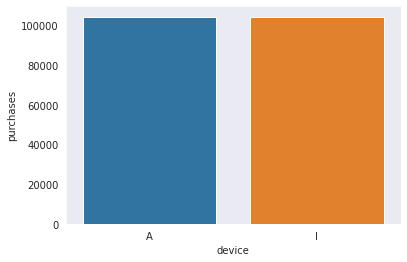

In [9]:
# Check buys by device
sns.barplot(data=df.groupby('device', as_index=False).agg({'purchases': 'sum'}), x='device', y='purchases')
plt.show()

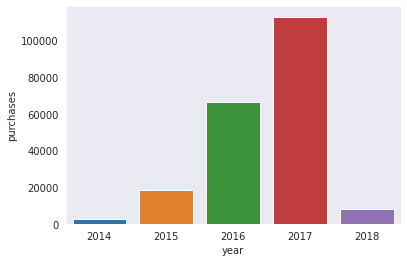

In [10]:
# Check buys by year
sns.barplot(data=df.groupby('year', as_index=False).agg({'purchases': 'sum'}), x='year', y='purchases')
plt.show()

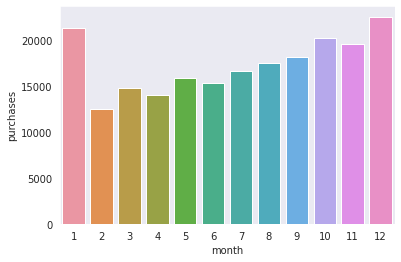

In [11]:
# Check buys by month
sns.barplot(data=df.groupby('month', as_index=False).agg({'purchases': 'sum'}), x='month', y='purchases')
plt.show()

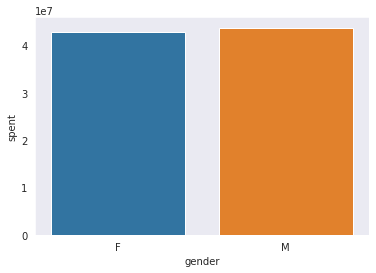

In [12]:
# Check spent by gender
sns.barplot(data=df.groupby('gender', as_index=False).agg({'spent': 'sum'}), x='gender', y='spent')
plt.show()

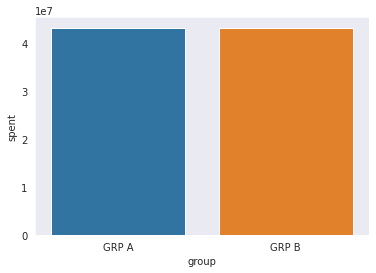

In [13]:
# Check spent by group
sns.barplot(data=df.groupby('group', as_index=False).agg({'spent': 'sum'}), x='group', y='spent')
plt.show()

In [14]:
# Check average purchase and spent by group and device
df.groupby(['group', 'device'], as_index=False).agg({'purchases': 'mean', 'spent': 'mean'}).head()

,group,device,purchases,spent
0,GRP A,A,4.526160,1880.404631
1,GRP A,I,4.546520,1880.603628
2,GRP B,A,4.558069,1889.334928
3,GRP B,I,4.546797,1883.474998


In [15]:
# Check average spent by group
df.groupby(['group'], as_index=False).agg({'spent': 'mean'}).head()

,group,spent
0,GRP A,1880.504281
1,GRP B,1886.419822


Podemos assumir que o grupo B tem um ticket médio maior que o grupo A e isso não acontece devido ao acaso?

### **Experimento**

Passos:
 - Escolha do método:
    - Diferença de médias;
 - Preparação dos dados:
    - Divisão dos grupos;
 - Teste de hipótese

#### Escolha do método
Podemos assumir que o grupo B tem um ticket médio maior que o grupo A e isso não acontece devido ao acaso?

Portanto diferença de médias.

#### Preparação dos dados

In [67]:
# Check usuários que podem estar nos 2 grupos
multigroup_users = df.groupby(['uid'], as_index=False).agg({'group': 'count'}).query('group > 1')['uid'].tolist()
df_exp = df[~df.uid.isin(multigroup_users)]

# Separando grupos
df_gpa = df_exp[df_exp.group == 'GRP A']
df_gpb = df_exp[df_exp.group == 'GRP B']

df_gpa = df_gpa[['spent']]
df_gpb = df_gpb[['spent']]

print('Pré ajuste')
print(f'GRP A size: {df_gpa.shape}')
print(f'GRP B size: {df_gpb.shape}\n')

# Como o grupo A tem mais dados
# tirarei uma amostra aleatória 
# com o mesmo do grupo B

df_gpa = df_gpa.sample(df_gpb.shape[0], random_state=42)
print('Pós ajuste')
print(f'GRP A size: {df_gpa.shape}')
print(f'GRP B size: {df_gpb.shape}')

Pré ajuste
GRP A size: (23009, 1)
GRP B size: (22874, 1)

Pós ajuste
GRP A size: (22874, 1)
GRP B size: (22874, 1)


##### Condições paramétricas

In [48]:
# Amostras independentes - OK

Kolmogorov p-value GRP A: 0.0
Kolmogorov p-value GRP B: 0.0
Shapiro p-value GRP A: 8.169780241783332e-40
Shapiro p-value GRP B: 8.169780241783332e-40


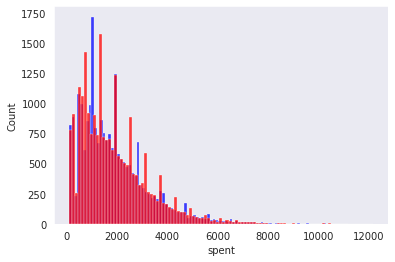

In [68]:
# Normalmente distribuídas - NOT OK

# Para n > 5000 testes de normalidade não funcionam muito bem
# https://medium.com/dados-e-saude/testes-de-normalidade-9dc9068bcf80

from scipy.stats import kstest
from scipy.stats import norm
_, p_value_gpa = kstest(df_gpa, norm.cdf)
_, p_value_gpb = kstest(df_gpb, norm.cdf)

print(f'Kolmogorov p-value GRP A: {p_value_gpa}')
print(f'Kolmogorov p-value GRP B: {p_value_gpb}')

# Amostragem de 5000
from scipy.stats import shapiro
_, p_value_gpa = shapiro(df_gpa.spent.sample(3000, random_state=13))
_, p_value_gpb = shapiro(df_gpa.spent.sample(3000, random_state=13))

print(f'Shapiro p-value GRP A: {p_value_gpa}')
print(f'Shapiro p-value GRP B: {p_value_gpb}')

# Checando via histograma e boxplot
import seaborn as sns
sns.set_style('dark')

sns.histplot(data=df_gpa['spent'], color='b')
sns.histplot(data=df_gpb['spent'], color='r')

In [69]:
# Igualdade de variâncias - OK
import numpy as np

print(f'Variância GRP A: {np.var(df_gpa.spent)}')
print(f'Variância GRP B: {np.var(df_gpb.spent)}')
print(f'Diff variâncias: {np.var(df_gpa.spent) / np.var(df_gpb.spent)}')

def f_test(samp_1, samp_2):
    from scipy.stats import f    
    f_test_statistic = np.var(samp_1, ddof=1) / np.var(samp_2, ddof=1)    
    dfn = samp_1.size - 1 
    dfd = samp_2.size - 1
    p_value = 1 - f.cdf(f_test_statistic, dfn, dfd)    
    return f_test_statistic, p_value

_, p_value = f_test(df_gpa, df_gpb)
print(f'p-value variância: {p_value[0]}')

Variância GRP A: 1875300.0945003089
Variância GRP B: 1847948.5699682112
Diff variâncias: 1.0148010204269744
p-value variância: 0.13327970707179992


### Teste de hipótese
Por não possuirem uma distribuição normal o teste utilizado será o Mann-Whitney U, o teste de Wilcoxon é só pra caráter informativo

In [71]:
from scipy.stats import mannwhitneyu
_, p_value = mannwhitneyu(df_gpa, df_gpb)

print('Mann-Whitney U-test')
print(f'Resultado teste hipótese: {p_value[0]}\n')

from scipy.stats import wilcoxon
_, p_value = wilcoxon(df_gpa.spent, df_gpb.spent)

print('Wilcoxon test')
print(f'Resultado teste hipótese: {p_value}\n')

Mann-Whitney U-test
Resultado teste hipótese: 0.434294667300135

Wilcoxon test
Resultado teste hipótese: 0.16064447787363112

